In [1]:
import numpy as np
import pandas as pd

from statistics import stdev
import scipy
from scipy.stats import chi2_contingency

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
sns.set_context("notebook")

In [2]:
pd.options.display.max_columns = None

In [3]:
data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")

In [4]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [5]:
# Understanding column types
data.info()
# There are 25 numerical columns and 9 categorical variables in the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
# check for null values
data.isnull().sum()
# No null values in the data

In [8]:
data.drop(['EmployeeCount','Over18','StandardHours'],axis=1,inplace=True) # Insignificant Features 

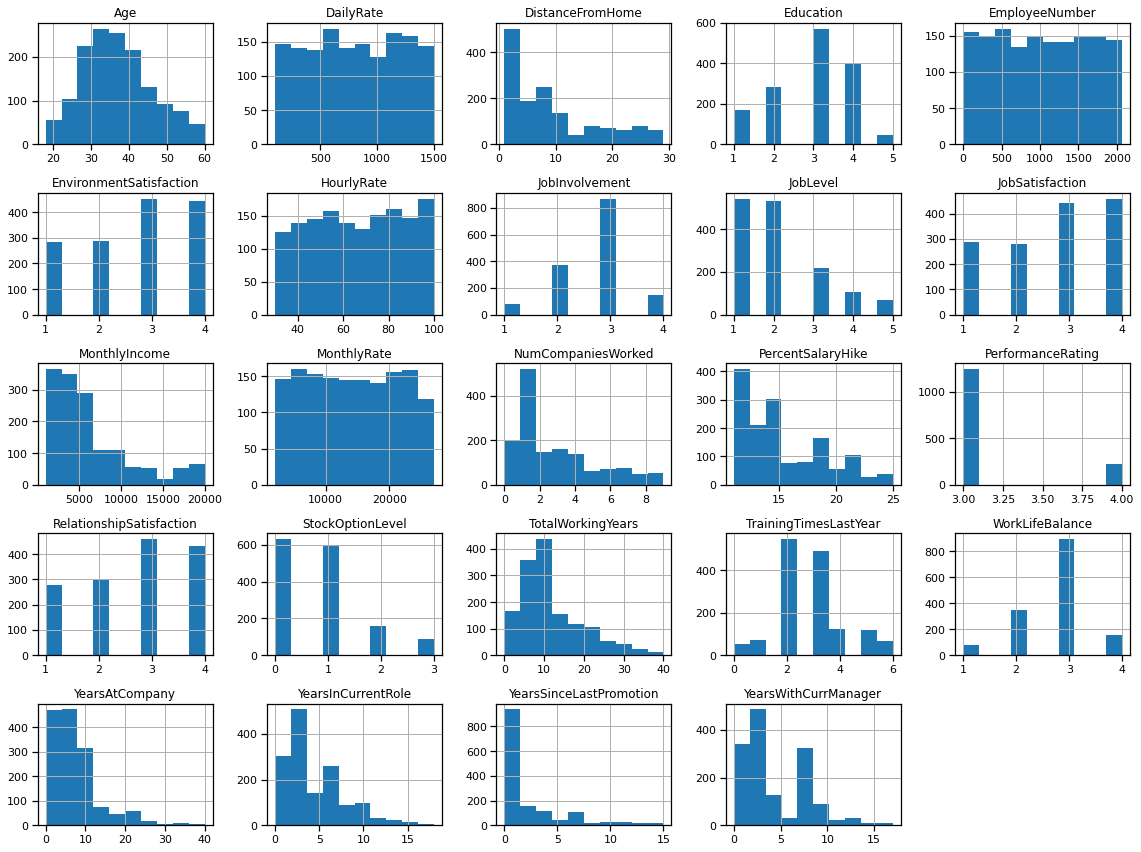

In [9]:
data.hist(figsize=(16,12))
plt.tight_layout()

In [10]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


<AxesSubplot:xlabel='Attrition', ylabel='count'>

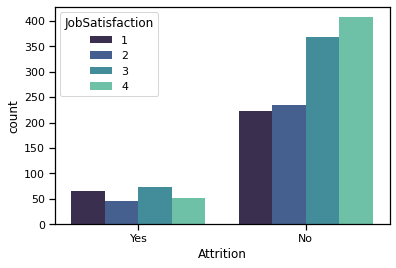

In [45]:
sns.countplot(data = data, x = 'Attrition', hue='JobSatisfaction', palette='mako')

<AxesSubplot:xlabel='Age', ylabel='count'>

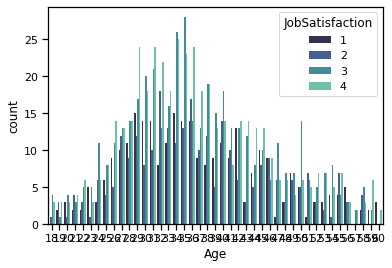

In [49]:
sns.countplot(data = data, x = 'Age', hue='JobSatisfaction', palette='mako')
# Based on this plot, we can see that people giving higher job satisfaction rating are the ones 
# who have rare business travels

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

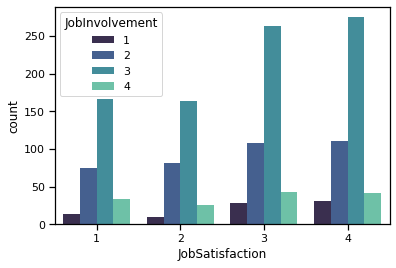

In [43]:
sns.countplot(data = data, x = 'JobSatisfaction', hue = 'JobInvolvement', palette='mako')
# Here we see that despite having high job involvement, many employees are still likely to have lower 
# job satisfaction rating,

<AxesSubplot:xlabel='MonthlyIncome', ylabel='JobSatisfaction'>

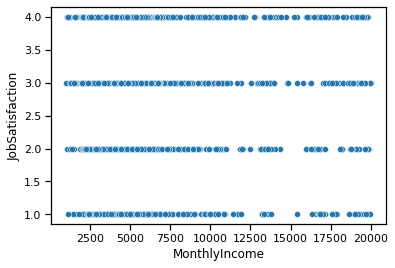

In [26]:
sns.scatterplot(data = data, x = 'MonthlyIncome', y = 'JobSatisfaction')

In [19]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [38]:
data['switch rate'] = data.apply(lambda row: row.NumCompaniesWorked/row.TotalWorkingYears if row.TotalWorkingYears > 0 else 0, axis=1)

In [40]:
data[data['TotalWorkingYears'] == 0]['switch rate']

23      0.0
127     0.0
296     0.0
301     0.0
457     0.0
615     0.0
727     0.0
828     0.0
972     0.0
1153    0.0
1311    0.0
Name: switch rate, dtype: float64

<AxesSubplot:>

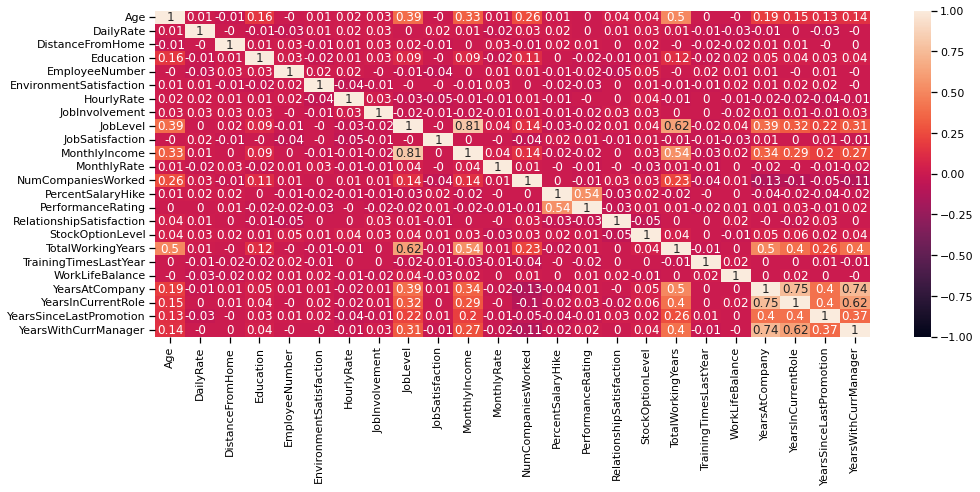

In [29]:
cat_cols=[]
for i in data.columns:
    if data[i].dtype == object:
        cat_cols.append(i)
df=data.copy()
df.drop(df[cat_cols], axis=1, inplace=True)
corr=df.corr(method='kendall').round(2)

plt.figure(figsize=(16, 6))
sns.heatmap(corr,vmin=-1, vmax=1,annot=True)
# The correlation values are below 0.8 for all variables

### Exploratory Data Analysis

In [ ]:
# Understanding the categorical columns and their values
cat_cols=data.select_dtypes(include=object).columns.tolist()
cat_df=pd.DataFrame(data[cat_cols].melt(var_name='column', value_name='value')
                    .value_counts()).rename(columns={0: 'count'}).sort_values(by=['column', 'count'])
display(data.select_dtypes(include=object).describe())
display(cat_df)

In [ ]:
sns.countplot(data = data, x='JobSatisfaction', hue='Attrition', palette='mako')

In [ ]:
import plotly.graph_objects as go

plot_df2=data[data.Attrition=='Yes']
plot_df2=plot_df2['Department'].value_counts(normalize=True)
plot_df2=plot_df2.mul(100).rename('Percent').reset_index().sort_values('Percent', ascending=False)
plot_df2.rename(columns={'index':'Department'}, inplace=True)
fig = go.Figure(data=[go.Pie(labels=plot_df2['Department'], values=plot_df2['Percent'], opacity=0.85, hole=0.4,
                     hovertemplate='%{label}<br>Attrition Rate: %{value:.3}%<extra></extra>',
                     marker_colors=['#587D65','#ADC4B2','#D1C9C2'])])
fig.show()

In [ ]:
sns.violinplot(data=data, x="JobSatisfaction", y="MonthlyIncome")

In [ ]:
sns.violinplot(data=data, x="JobSatisfaction", y="YearsSinceLastPromotion")

In [ ]:
data.drop(columns=["Attrition"],inplace=True)

In [ ]:
# In order to identify the features affecting job satisfaction the most, 
# we will consider rating 1 & 2 as not satisfied and 3 & 4 as satisfied to run a regression model
data['JobSatisfaction'] = data['JobSatisfaction'].map({1:'No',2:'No',3:'Yes',4:'Yes'})

In [ ]:
sns.countplot(data = data, x='JobSatisfaction', palette='mako')

In [ ]:
data.dtypes

In [ ]:
data.head()

In [31]:
df = data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeNumber            1470 non-null   int64 
 9   EnvironmentSatisfaction   1470 non-null   int64 
 10  Gender                    1470 non-null   object
 11  HourlyRate                1470 non-null   int64 
 12  JobInvolvement            1470 non-null   int64 
 13  JobLevel                  1470 non-null   int64 
 14  JobRole                 

In [ ]:
df['JobSatisfaction'] = df['JobSatisfaction'].map({'No':0,'Yes':1})
#df['OverTime'] = df['OverTime'].map({'No':0,'Yes':1})
#df['Gender'] = df['Gender'].map({'Male':0,'Female':1})
df.head()

In [ ]:
df.dtypes

In [32]:
# Change all objects into categories
df[df.select_dtypes(['object']).columns] = df.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   int64   
 7   EducationField            1470 non-null   category
 8   EmployeeNumber            1470 non-null   int64   
 9   EnvironmentSatisfaction   1470 non-null   int64   
 10  Gender                    1470 non-null   category
 11  HourlyRate                1470 non-null   int64   
 12  JobInvolvement            1470 non-null   int64   
 13  JobLevel                  1470 non-null   int64 

In [34]:
cat_cols=df.select_dtypes(include="category").columns.tolist() 
chi_statistic=[]
p_val=[]
vars_rm=[]

for i in df[cat_cols]:
    observed=pd.crosstab(index=df["JobSatisfaction"], columns=df[i])
    stat, p, dof, expected=chi2_contingency(observed)
    chi_statistic.append(stat)
    p_val.append(p)
    if p >= 0.05:
        print("JobSatisfaction and {} are independent (p-value = {:.2f}).\n".format(i,p))
        vars_rm.append(i)

chi_df = pd.DataFrame()
chi_df["Variable"] = cat_cols
chi_df["Chi_Statistic"] = chi_statistic
chi_df["P_value"] = p_val
chi_df=chi_df[chi_df.P_value<0.05].sort_values("P_value", ascending=True)
display(chi_df)

JobSatisfaction and BusinessTravel are independent (p-value = 0.52).

JobSatisfaction and Department are independent (p-value = 0.20).

JobSatisfaction and EducationField are independent (p-value = 0.36).

JobSatisfaction and Gender are independent (p-value = 0.47).

JobSatisfaction and JobRole are independent (p-value = 0.78).

JobSatisfaction and MaritalStatus are independent (p-value = 0.83).

JobSatisfaction and OverTime are independent (p-value = 0.30).



,Variable,Chi_Statistic,P_value
0,Attrition,17.505077,0.000556


In [ ]:
from sklearn import linear_model
from mlxtend.feature_selection import SequentialFeatureSelector

sfs = SequentialFeatureSelector(linear_model.LogisticRegression(),
                                k_features=5,
                                forward=True,
                                scoring='accuracy',
                                cv=None)
selected_features = sfs.fit(X, y)

In [ ]:
selected_features.k_feature_names_

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

def evaluate(model, X_train, X_test, y_train, y_test):
    y_test_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)

    print("TRAINIG RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_train, y_train_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_train, y_train_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_train, y_train_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [ ]:
y=df['JobSatisfaction']
X=df.loc[:, df.columns != 'JobSatisfaction']
X.drop(columns=X.select_dtypes(include="category").columns.tolist(),inplace=True)
#X=pd.get_dummies(X, columns=X.select_dtypes(include="category").columns.tolist(), drop_first=True)
X.columns=X.columns.str.replace(' ', '')
X.head()

In [ ]:
# Create Train Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=21)
print("Train Shape:", X_train.shape, y_train.shape)
print("Test set Shape:", X_test.shape, y_test.shape)

In [ ]:
y_train

In [ ]:
# Scale the data
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train.head()

In [ ]:
# Apply Logistic Regression
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear', penalty='l1')
lr_clf.fit(X_train, y_train)
evaluate(lr_clf, X_train, X_test, y_train, y_test)